## See the signal in the data ##

Because GW150914 was relatively loud, it is readily visible in the data. 

In [3]:
import sys
!{sys.executable} -m pip install pycbc lalsuite ligo-common --no-cache-dir

### See GW150914 in the time series ###

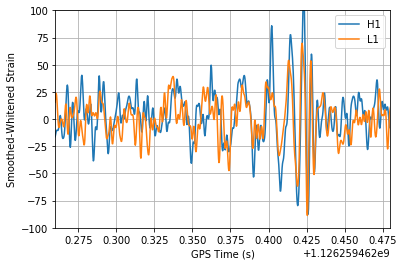

In [4]:
%matplotlib inline
from pycbc.filter import highpass_fir, lowpass_fir
from pycbc.psd import welch, interpolate
import pylab

from pycbc.catalog import Merger

for ifo in ['H1', 'L1']:
    # Read data: The data is available to the public through losc.ligo.org!
    ts = Merger("GW150914").strain(ifo)
    
    # Estimate the noise spectrum and use it to whiten the data
    psd = interpolate(welch(ts), 1.0 / ts.duration)
    white_strain = (ts.to_frequencyseries() / psd ** 0.5).to_timeseries()

    # remove frequencies below and above where the main portion of the signal lies
    smooth = highpass_fir(white_strain, 35, 8)
    smooth = lowpass_fir(smooth, 300, 8)

    # time shift and flip L1 to match the time of arrival and phase of Hanford
    if ifo == 'L1':
        smooth *= -1
        smooth.roll(int(.007 / smooth.delta_t))

    pylab.plot(smooth.sample_times.numpy(), smooth.numpy(), label=ifo)

# Plot the region around the signal (time is in gps seconds)
pylab.legend()
pylab.xlim(1126259462.26, 1126259462.48)
pylab.ylabel('Smoothed-Whitened Strain')
pylab.grid()
pylab.ylim(-100, 100)
pylab.xlabel('GPS Time (s)')
pylab.show()

### See the time frequency evolution of GW150914 in Hanford ###

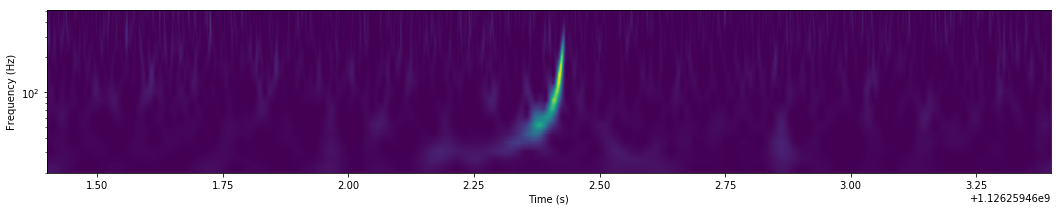

In [5]:
ts = Merger("GW150914").strain("H1")

ts = ts.whiten(4, 4)
zoom = ts.time_slice(1126259462.4 - 1, 1126259462.4 + 1)
times, freqs, power = zoom.qtransform(.001, 1, frange=(20, 512), qrange=(4, 64))

pylab.figure(figsize=(18, 3))
pylab.pcolormesh(times, freqs, power)
pylab.ylim(20, 512)
pylab.xlabel('Time (s)')
pylab.ylabel('Frequency (Hz)')
pylab.xlim(times.min(), times.max())
pylab.yscale('log')

### See the time frequency evolution of GW150914 in Livingston ###

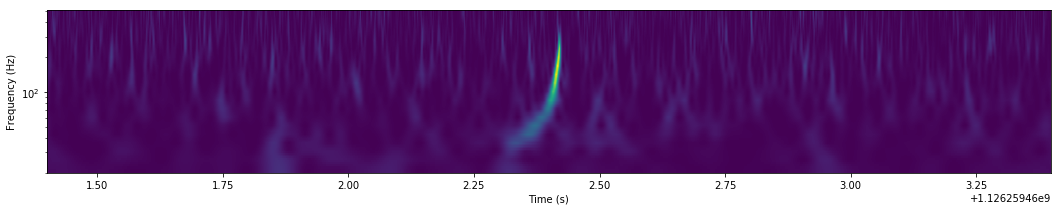

In [6]:
from pycbc.frame import read_frame
ts = Merger("GW150914").strain("L1")

ts = ts.whiten(4, 4)
zoom = ts.time_slice(1126259462.4 - 1, 1126259462.4 + 1)
times, freqs, power = zoom.qtransform(.001, 1, frange=(20, 512), qrange=(4, 64))

pylab.figure(figsize=(18, 3))
pylab.pcolormesh(times, freqs, power)
pylab.ylim(20, 512)
pylab.xlabel('Time (s)')
pylab.ylabel('Frequency (Hz)')
pylab.xlim(times.min(), times.max())
pylab.yscale('log')